In [1]:
import numpy as np
import sh_decision_tree as shd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

**Problem 3 - Information gain ratio exercise**

In [3]:
training_set = "data/Druns.txt"
X3, y3 = shd.read_data(training_set)##loading training data to np array
for feature in range(X3.shape[1]):##for each feature
    thresholds = np.unique(X3[:, feature]) ## considering all unique values in the training data as potential split thresholds
    for threshold in thresholds:
        y1 = y3[X3[:, feature] >= threshold]##as per the given split rule, xj >= c
        y2 = y3[X3[:, feature] < threshold]
        p1 = len(y1) / len(y3)
        p2 = len(y2) / len(y3)
        info_gain =  shd.entropy(y3) - p1 * shd.entropy(y1) - p2 * shd.entropy(y2)
        if p1==0 or p1==1:
            split_entropy = 0
        else:
            split_entropy = -p1 * np.log2(p1) - p2 * np.log2(p2)

        if split_entropy == 0:
            print("feature number: ", feature, "threshold: ", threshold, "information_gain: ", info_gain)
        else:
            print("feature number: ", feature, "threshold: ", threshold, "information_gain_ratio: ", info_gain / split_entropy)


feature number:  0 threshold:  0.0 information_gain:  0.0
feature number:  0 threshold:  0.1 information_gain_ratio:  0.10051807676021828
feature number:  1 threshold:  -2.0 information_gain:  0.0
feature number:  1 threshold:  -1.0 information_gain_ratio:  0.10051807676021828
feature number:  1 threshold:  0.0 information_gain_ratio:  0.0559537596312636
feature number:  1 threshold:  1.0 information_gain_ratio:  0.00578004220515232
feature number:  1 threshold:  2.0 information_gain_ratio:  0.0011443495172767494
feature number:  1 threshold:  3.0 information_gain_ratio:  0.016411136842102134
feature number:  1 threshold:  4.0 information_gain_ratio:  0.04974906418177849
feature number:  1 threshold:  5.0 information_gain_ratio:  0.11124029586339806
feature number:  1 threshold:  6.0 information_gain_ratio:  0.23609960614360798
feature number:  1 threshold:  7.0 information_gain_ratio:  0.055953759631263686
feature number:  1 threshold:  8.0 information_gain_ratio:  0.4301569161309807


**Problem 4 - The king of interpretability**

In [4]:
training_set_p4 = "data/D3leaves.txt"
X4, y4 = shd.read_data(training_set_p4)##loading training data to np array
tree_p4 = shd.tree_build(X4, y4) ##building tree using the training data

In [5]:
##plotting the tree
shd.plot_tree(tree_p4)


Is X0 >= 10.0? 
--> True:
   Predict y = 1
--> False:
   Is X1 >= 3.0? 
   --> True:
      Predict y = 1
   --> False:
      Predict y = 0


**Problem 5 - Or is it?**

In [6]:
training_set_5_1 = "data/D1.txt"
X5_1, y5_1 = shd.read_data(training_set_5_1)##loading training data to np array
tree_p5_1 = shd.tree_build(X5_1, y5_1) ##building tree using the training data 5_1 defined above
shd.plot_tree(tree_p5_1) ##plotting the tree

Is X1 >= 0.201829? 
--> True:
   Predict y = 1
--> False:
   Predict y = 0


*If the value of the first feature(X1) is greater than or equal to 0.201829 then the output class/label is 1, otherwise it is 0.*

In [7]:
training_set_5_2 = "data/D2.txt"
X5_2, y5_2 = shd.read_data(training_set_5_2)##loading training data to np array
tree_p5_2 = shd.tree_build(X5_2, y5_2) ##building tree using the training data 5_2 defined above
shd.plot_tree(tree_p5_2) ##plotting the tree

Is X0 >= 0.533076? 
--> True:
   Is X1 >= 0.228007? 
   --> True:
      Is X1 >= 0.424906? 
      --> True:
         Predict y = 1
      --> False:
         Is X0 >= 0.708127? 
         --> True:
            Predict y = 1
         --> False:
            Is X1 >= 0.32625? 
            --> True:
               Is X0 >= 0.595471? 
               --> True:
                  Is X0 >= 0.646007? 
                  --> True:
                     Predict y = 1
                  --> False:
                     Is X1 >= 0.403494? 
                     --> True:
                        Predict y = 1
                     --> False:
                        Predict y = 0
               --> False:
                  Predict y = 0
            --> False:
               Predict y = 0
   --> False:
      Is X0 >= 0.887224? 
      --> True:
         Is X1 >= 0.037708? 
         --> True:
            Is X1 >= 0.082895? 
            --> True:
               Predict y = 1
            --> False:
               

**Problem 6 - Hypothesis space**

In [23]:
##plotting decision boundary based on the given tree and test data
def plot_decision_boundary(X, tree, name):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
    X_region = np.column_stack((x1.ravel(),x2.ravel()))
    y_pred_region = np.array([shd.predict(tree, x) for x in X_region])
    y_pred_region = y_pred_region.reshape(x1.shape)
    plt.contourf(x1, x2, y_pred_region, alpha=0.7)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(name)
    plt.show()

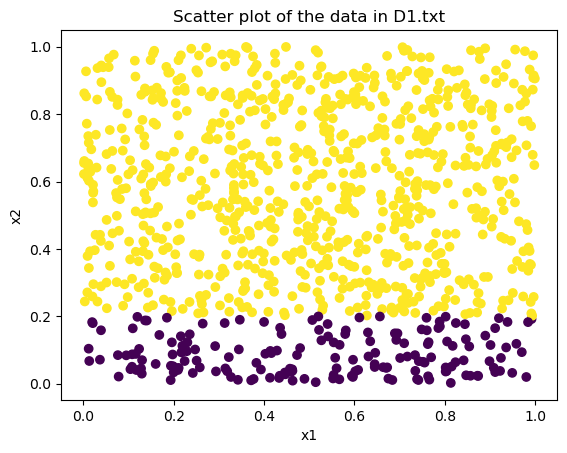

In [24]:
##scatter plot of the 5.1 data
plt.scatter(X5_1[:, 0], X5_1[:, 1], c=y5_1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of the data in D1.txt")
plt.show()

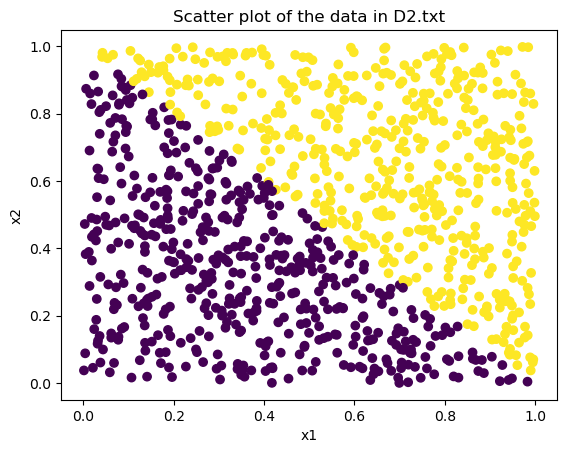

In [25]:
##scatter plot of the 5.2 data
plt.scatter(X5_2[:, 0], X5_2[:, 1], c=y5_2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of the data in D2.txt")
plt.show()

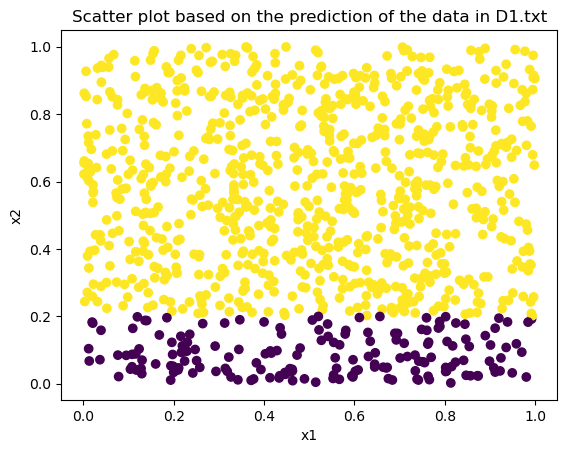

In [26]:
##prediction calcuation for the 5.1 data
y5_1_predict = np.array([shd.predict(tree_p5_1, x) for x in X5_1])
##plotting the decision boundary for the 5.1 data using scatter plot
plt.scatter(X5_1[:, 0], X5_1[:, 1], c=y5_1_predict)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot based on the prediction of the data in D1.txt")
plt.show()

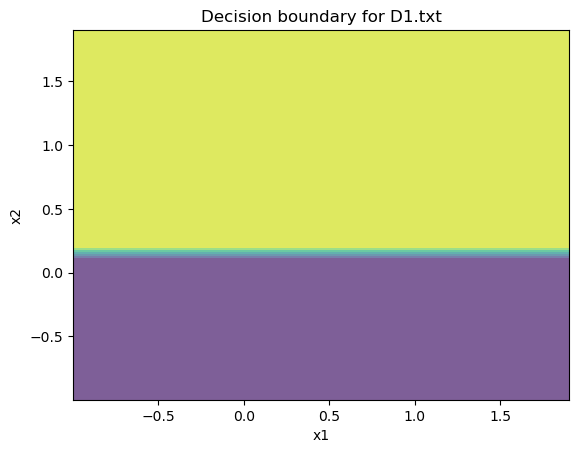

In [27]:
## MAIN decision boundary for D1.txt
plot_decision_boundary(X5_1, tree_p5_1, "Decision boundary for D1.txt")

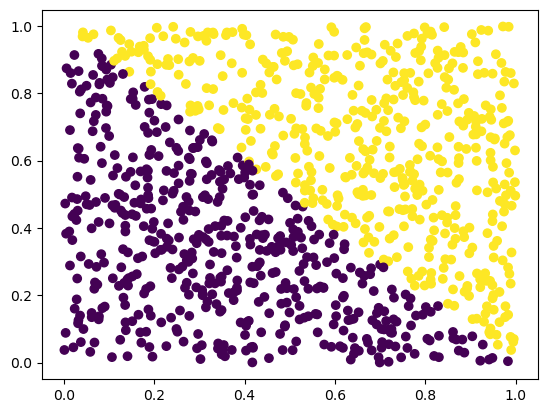

In [16]:
##prediction calcuation for the 5.2 data
y5_2_predict = np.array([shd.predict(tree_p5_2, x) for x in X5_2])
##plotting the decision boundary for the 5.2 data using scatter plot
plt.scatter(X5_2[:, 0], X5_2[:, 1], c=y5_2_predict)

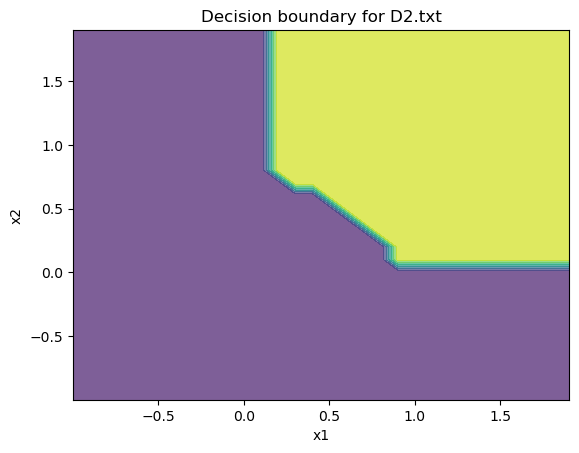

In [29]:
## MAIN decision boundary for D2.txt
plot_decision_boundary(X5_2, tree_p5_2, "Decision boundary for D2.txt")

**7 Learning curve**

In [31]:
input_data_7 = "data/Dbig.txt"
X7, y7 = shd.read_data(input_data_7)##loading training data to np array
##random permuation and splitting the data into training (8192) and test data (rest)
permuted_indices = np.random.permutation(len(X7))
X7_train = X7[permuted_indices[:8192]]
y7_train = y7[permuted_indices[:8192]]
X7_test = X7[permuted_indices[8192:]]
y7_test = y7[permuted_indices[8192:]]

print("training data size X, Y: ", len(X7_train), len(y7_train))

training data size X, Y:  8192 8192


In [33]:
##creatnig nested training data based on above split
nested_sequence_n = np.array([32, 128, 512, 2048, 8192])
nested_sets = []
for n in nested_sequence_n:
    nested_sets.append([X7_train[:n], y7_train[:n]])

print("nested_sets lenght:", len(nested_sets), " nested_sets[0][0] lenght:", len(nested_sets[0][0]), " nested_sets[4][0] shape:", nested_sets[4][0].shape)

nested_sets lenght: 5  nested_sets[0][0] lenght: 32  nested_sets[4][0] shape: (8192, 2)


for tree D 32 , number of nodes in the tree: 9 test set error: 0.11449115044247793


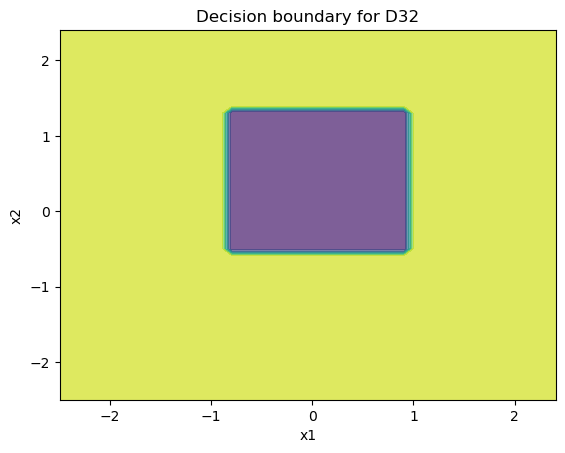

for tree D 128 , number of nodes in the tree: 25 test set error: 0.10121681415929207


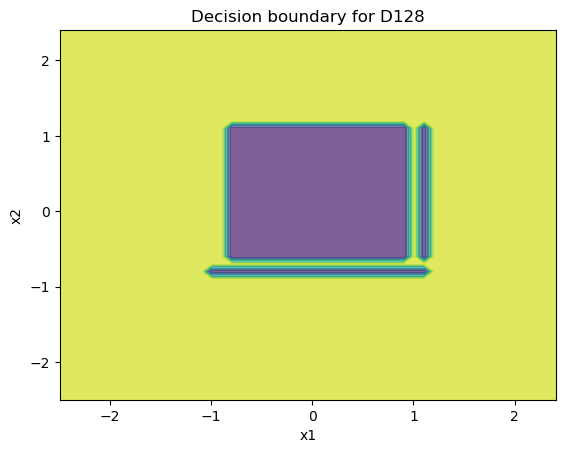

for tree D 512 , number of nodes in the tree: 75 test set error: 0.07411504424778759


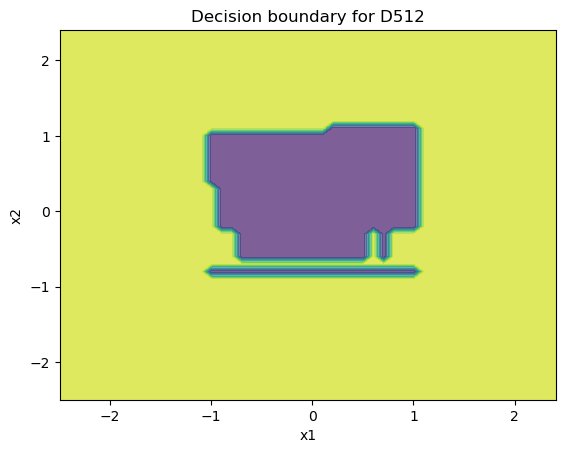

for tree D 2048 , number of nodes in the tree: 131 test set error: 0.039269911504424826


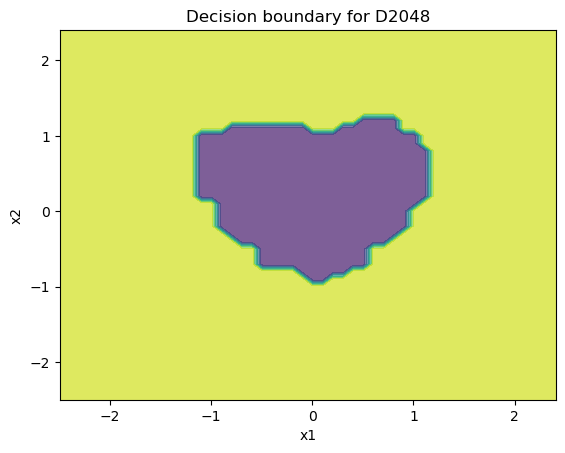

for tree D 8192 , number of nodes in the tree: 277 test set error: 0.01935840707964598


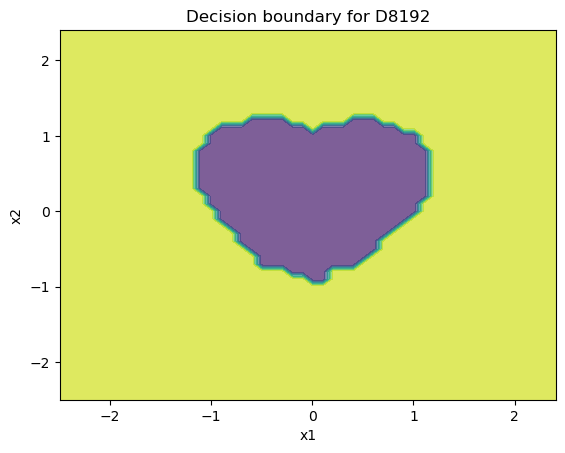

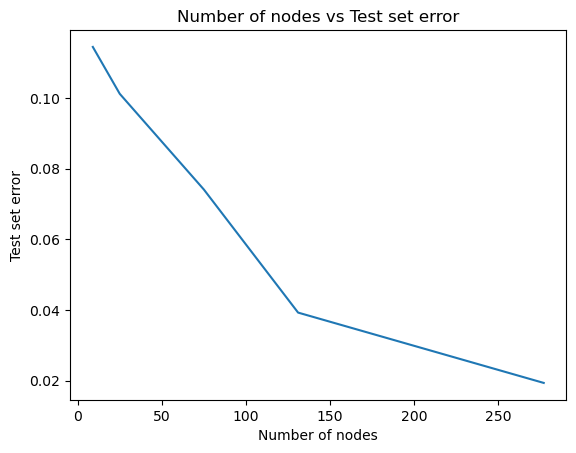

In [34]:
nodes_count_list = []
test_error_list = []
for Dn in nested_sets:
    tree_p7 = shd.tree_build(Dn[0], Dn[1]) ##building tree using each nested training sets created above
    number_nodes = shd.count_nodes(tree_p7) ##counting the number of nodes in the tree
    nodes_count_list.append(number_nodes)
    test_error = shd.calc_error(tree_p7, X7_test, y7_test) ##error is calculated using 1-accuracy
    test_error_list.append(test_error)
    print("for tree D", len(Dn[0]), ", number of nodes in the tree:", number_nodes, "test set error:", test_error)
    ##ploting decision boundary for each nested training set
    plot_decision_boundary(X7_test, tree_p7, name = "Decision boundary for D"+str(len(Dn[0])))
    

##plotting the number of nodes vs test error
plt.plot(nodes_count_list, test_error_list)
plt.xlabel("Number of nodes")
plt.ylabel("Test set error")
plt.title("Number of nodes vs Test set error")
plt.show()

**Problem 3.1 - sklearn**

for tree D 32 , number of nodes in the tree: 9 test set error: 0.08628318584070793
for tree D 128 , number of nodes in the tree: 29 test set error: 0.09015486725663713
for tree D 512 , number of nodes in the tree: 69 test set error: 0.06028761061946908
for tree D 2048 , number of nodes in the tree: 111 test set error: 0.028207964601769886
for tree D 8192 , number of nodes in the tree: 225 test set error: 0.01603982300884954


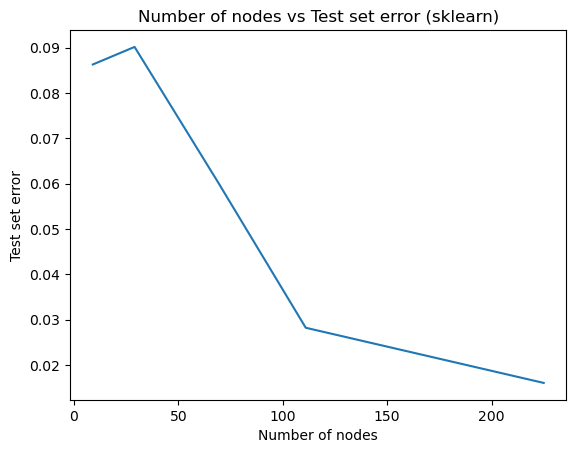

In [39]:
sk_nodes_count_list = []
sk_test_error_list = []
for Dn in nested_sets:
    sk_clf = DecisionTreeClassifier() ## as there is no infogain ratio criteria in sklearn, using the default gini criteria
    sk_clf.fit(Dn[0], Dn[1])
    node_count = sk_clf.tree_.node_count
    sk_nodes_count_list.append(node_count)
    error = 1-sk_clf.score(X7_test, y7_test) ##score gives mean accuracy
    sk_test_error_list.append(error)
    print("for tree D", len(Dn[0]), ", number of nodes in the tree:", node_count, "test set error:", error)


##plotting the number of nodes vs test error
plt.plot(sk_nodes_count_list, sk_test_error_list)
plt.xlabel("Number of nodes")
plt.ylabel("Test set error")
plt.title("Number of nodes vs Test set error (sklearn)")
plt.show()

**4.1 - Lagrange Interpolation**

In [40]:
##building the model using lagrange interpolation

a = 0
b = 1000
X_r_train = np.random.uniform(a, b, 100) ##uniform samples
y_r_train = np.sin(X_r_train)

##build lagrange interpolation model

def Lagrange_Interpolation_pred(X, y, x):
    y_pred = 0
    n = len(X)
    for i in range(n):
        l_x = 1
        for j in range(n):
            if i != j:
                l_x = l_x * (x - X[j]) / (X[i] - X[j])
        y_pred = y_pred + y[i] * l_x
    return y_pred

##test set
X_r_test = np.random.uniform(a, b, 100) ##uniform samples--same distribution as training data
y_r_test = np.sin(X_r_test)

##calcuating error
#train error
y_r_train_pred = np.array([Lagrange_Interpolation_pred(X_r_train, y_r_train, x) for x in X_r_train])
r_train_error = np.sqrt(np.mean((y_r_train_pred - y_r_train)**2)) ##mean squared error
print("train error:", r_train_error)

y_r_test_pred = np.array([Lagrange_Interpolation_pred(X_r_train, y_r_train, x) for x in X_r_test])
r_test_error = np.sqrt(np.mean((y_r_test_pred - y_r_test)**2)) ##mean squared error
print("test error:", r_test_error)

########
##print(y_r_test_pred,y_r_test)

train error: 0.0
test error: 5.2053301499576e+36


In [41]:
###adding zero-mean Gaussian noise E added to x
for stand_dev in np.linspace(0,2,5):
    X_r_train_noise = X_r_train + np.random.normal(0, stand_dev, 100)
    y_r_train_pred_noise = np.array([Lagrange_Interpolation_pred(X_r_train_noise, y_r_train, x) for x in X_r_train_noise])
    r_train_error_noise = np.sqrt(np.mean((y_r_train_pred_noise - y_r_train)**2))
    print("train error with noise(sd =",stand_dev, "):", r_train_error_noise)

    y_r_test_pred_noise = np.array([Lagrange_Interpolation_pred(X_r_train_noise, y_r_train, x) for x in X_r_test])
    r_test_error_noise = np.sqrt(np.mean((y_r_test_pred_noise - y_r_test)**2))
    print("test error with noise in train(sd =",stand_dev, "):", r_test_error_noise)

train error with noise(sd = 0.0 ): 0.0
test error with noise in train(sd = 0.0 ): 5.2053301499576e+36
train error with noise(sd = 0.5 ): 0.0
test error with noise in train(sd = 0.5 ): 4.5291311859086585e+36
train error with noise(sd = 1.0 ): 0.0
test error with noise in train(sd = 1.0 ): 1.6680908891706846e+37
train error with noise(sd = 1.5 ): 0.0
test error with noise in train(sd = 1.5 ): 1.7031935813423646e+37
train error with noise(sd = 2.0 ): 0.0
test error with noise in train(sd = 2.0 ): 2.940858403212631e+37


**Problem 2 - (Our algorithm is greedy)**

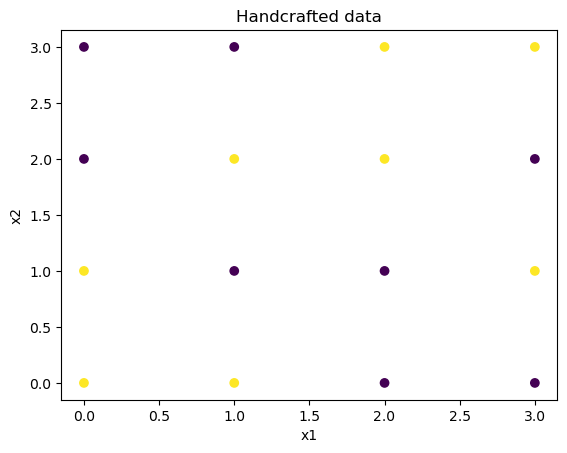

In [3]:
handcrafted_data_x = np.array([[0, 0], [0, 1], [0,2], [0,3], [1, 0], [1, 1], [1, 2], [1, 3] , [2, 0], [2, 1], [2, 2], [2, 3], [3, 0], [3, 1], [3, 2], [3, 3]])##input
handcrafted_data_y = np.array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]) ##labels
plt.scatter(handcrafted_data_x[:, 0], handcrafted_data_x[:, 1], c=handcrafted_data_y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Handcrafted data")
plt.show()


In [4]:
hct_tree = shd.tree_build(handcrafted_data_x, handcrafted_data_y)
print("number of nodes in the tree:", shd.count_nodes(hct_tree))
shd.plot_tree(hct_tree)


number of nodes in the tree: 1
Predict y = 1


In [44]:
hct_tree_2 = shd.tree_build(handcrafted_data_x[:10], handcrafted_data_y[:10])
print("number of nodes in the tree:", shd.count_nodes(hct_tree_2))
shd.plot_tree(hct_tree_2)

number of nodes in the tree: 7
Is X0 >= 2? 
--> True:
   Predict y = 0
--> False:
   Is X1 >= 1? 
   --> True:
      Is X1 >= 3? 
      --> True:
         Predict y = 0
      --> False:
         Predict y = 1
   --> False:
      Predict y = 1
